In [3]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import pandas as pd
import numpy as np

In [2]:
# Load the ResNet50 model with pre-trained ImageNet weights
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


### Preprocess an Image

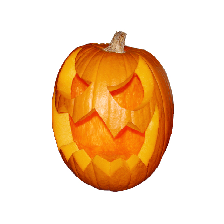

In [9]:
# Load an image from disk (make sure the image is 224x224 or resize it)
img_path = 'jack-o-lantern-1324414.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to a numpy array
x = image.img_to_array(img)

# Add a batch dimension (ResNet50 expects batch dimension in input)
x = np.expand_dims(x, axis=0)

# Preprocess the input for ResNet50 (normalization and scaling)
x = preprocess_input(x)
img

In [8]:
# Check the size of image
img.size

(224, 224)

### Make Predictions

In [10]:
# Make predictions
predictions = model.predict(x)

# Decode the predictions into readable class names
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}: {label} ({score:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 999ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
1: jack-o'-lantern (0.99)
2: orange (0.00)
3: lampshade (0.00)


### Fine-tune the Model

In [11]:
'''If we want to use Resnet50 as our base model, we can add our own layers, 
then retrain it on our dataset. As such, the below code will freeze the ResNet50 layers
and add custom layers on top:'''
# Freeze the ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Add custom layers
from tensorflow.keras import layers, models
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(10, activation='softmax')  # Assuming 10 output classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


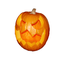

In [17]:
# For practice, let's Convert the image to the 64, 60 size

target_size = (64, 60)
img.resize(target_size, resample = Image.LANCZOS)

In [25]:
# if we get a list of images, i.e. from CIFAR 10 or CIFAR 100, we can use a for loop, like below, to apply resizing to all images

#vresized_imgs = [img.resize(target_size, resample = Image.LANCZOS) for Image in img]
#resized_imgs

In [28]:
# Lets examine our data numerically.
# This is most easily done by converting the image to a numpy array

# Convert one image to a NumPy array
pixel_values = np.array(img)

# Display the pixel values
print("Pixel Values:")
print(pixel_values)

Pixel Values:
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


Note the shape of the data: an array of arrays, where each internal array represents one row of pixels. The numbers indicate how bright each pixel is on a scale of 0 to 255 where 255 is full brightness and zero is black. These numbers are what our model will use to make predictions! Many image models expect floating point values, so its common practice to convert from integers to floating point before other preprocessing steps. Note that from this point forward, we will not be able to visualize the images without using some sort of plotting library; we've converted the images to numbers!

In [8]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in resized_imgs]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[21. 19. 19. ... 45. 45. 43.]
 [47. 43. 33. ... 45. 45. 45.]
 [64. 66. 75. ... 45. 45. 43.]
 ...
 [50. 43. 40. ...  0.  0.  0.]
 [49. 43. 33. ...  0.  0.  0.]
 [49. 47. 33. ... 29.  0.  0.]]


In [9]:
# To normalize pixel values to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])

Pixel Values:
[[0.08235294 0.07450981 0.07450981 ... 0.1764706  0.1764706  0.16862746]
 [0.18431373 0.16862746 0.12941177 ... 0.1764706  0.1764706  0.1764706 ]
 [0.2509804  0.25882354 0.29411766 ... 0.1764706  0.1764706  0.16862746]
 ...
 [0.19607843 0.16862746 0.15686275 ... 0.         0.         0.        ]
 [0.19215687 0.16862746 0.12941177 ... 0.         0.         0.        ]
 [0.19215687 0.18431373 0.12941177 ... 0.11372549 0.         0.        ]]


In [10]:
# Import the modules
from google.colab import drive
import pickle

drive.mount('/content/drive/')

# Open a new file named 'img_preprocessed.pkl' with write permission
with open('/content/drive/MyDrive/img_preprocessed.pkl', 'wb') as file:
    # Use pickle.dump to store the list of images
    pickle.dump(imgs, file)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [11]:
# Save our preprocessed images to a new pickle file

with open('/content/drive/My Drive/img_preprocessed.pkl', 'wb') as file:
    pickle.dump(normalized_images, file)